## IMPORT LIBRARY

In [129]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## MEMBACA GAMBAR



In [130]:
img = cv2.imread("text.jpg")

## KONVERT BGR KE RGB

In [131]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

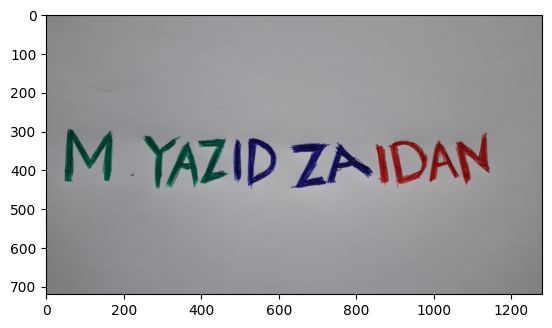

In [132]:
plt.imshow(rgb)

## DETEKSI RGB

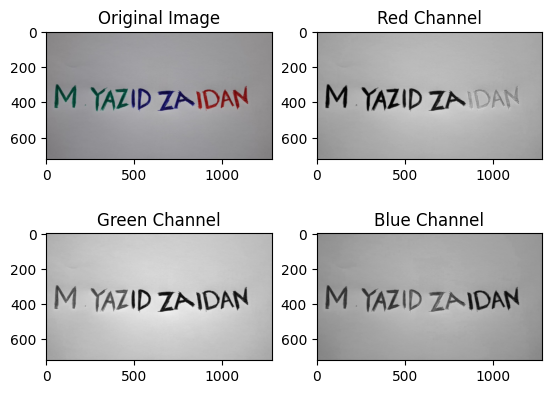

In [133]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow((rgb)[:,:,0], cmap="gray")
plt.title('Red Channel')

plt.subplot(2, 2, 3)
plt.imshow((rgb)[:,:,1], cmap="gray")
plt.title('Green Channel')

plt.subplot(2, 2, 4)
plt.imshow((rgb)[:,:,2], cmap="gray")
plt.title('Blue Channel')

plt.show()

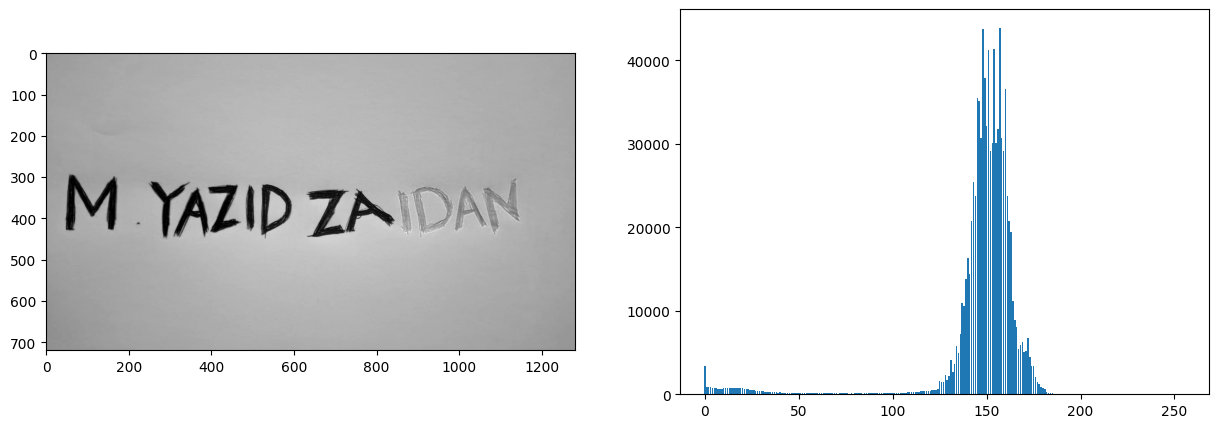

In [ ]:
merah=cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)[:,:,2 ] #Merah
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[1].bar(range(256), hist.ravel())  
plt.show()

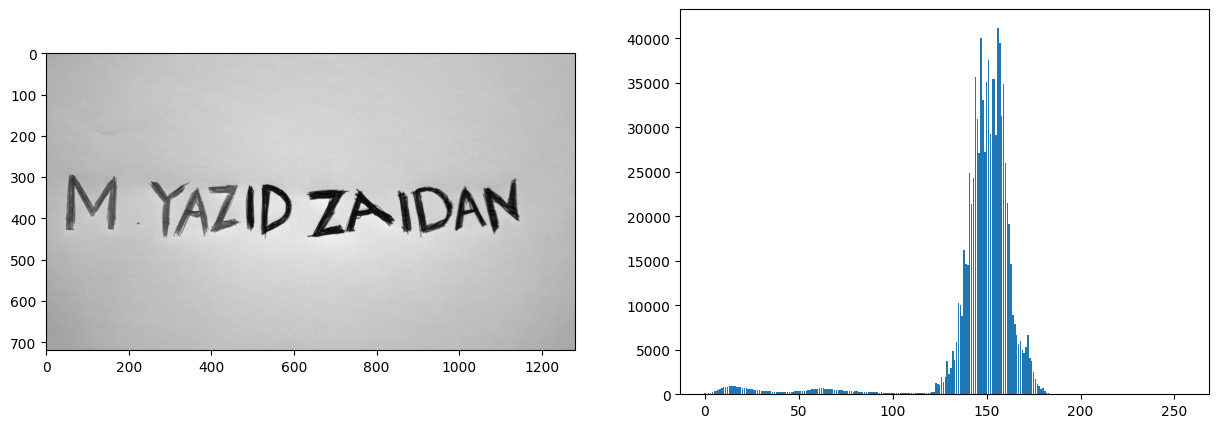

In [135]:
hijau = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)[:,:,1]  
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[1].bar(range(256), hist.ravel())  
plt.show()


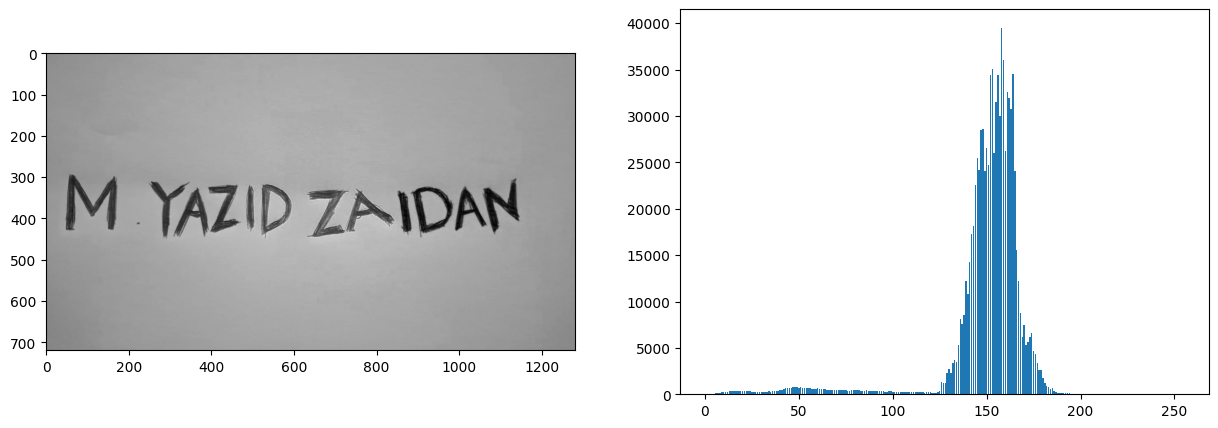

In [136]:
biru=cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)[:,:,0] #biru
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[1].bar(range(256), hist.ravel())  
plt.show()

## AMBANG BATAS

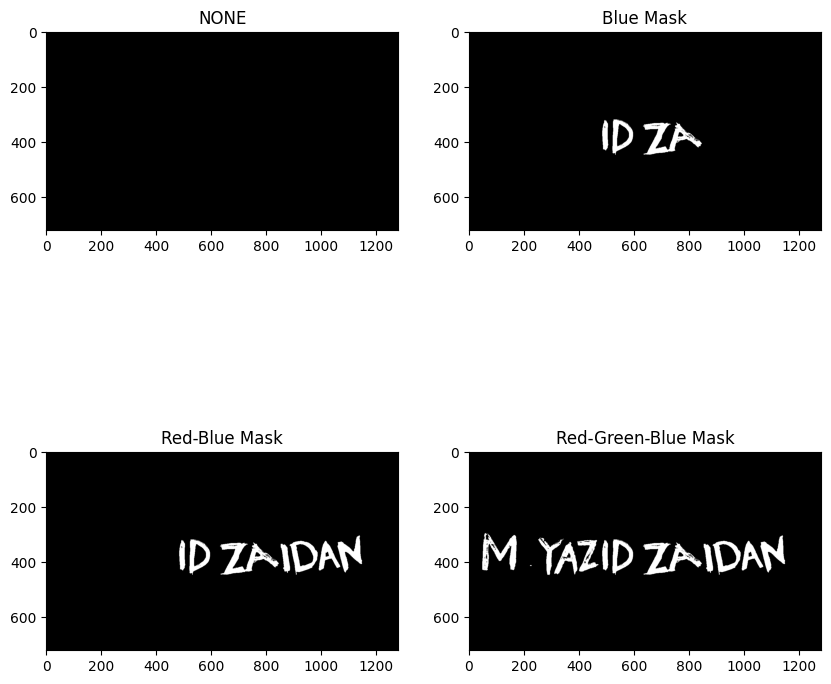

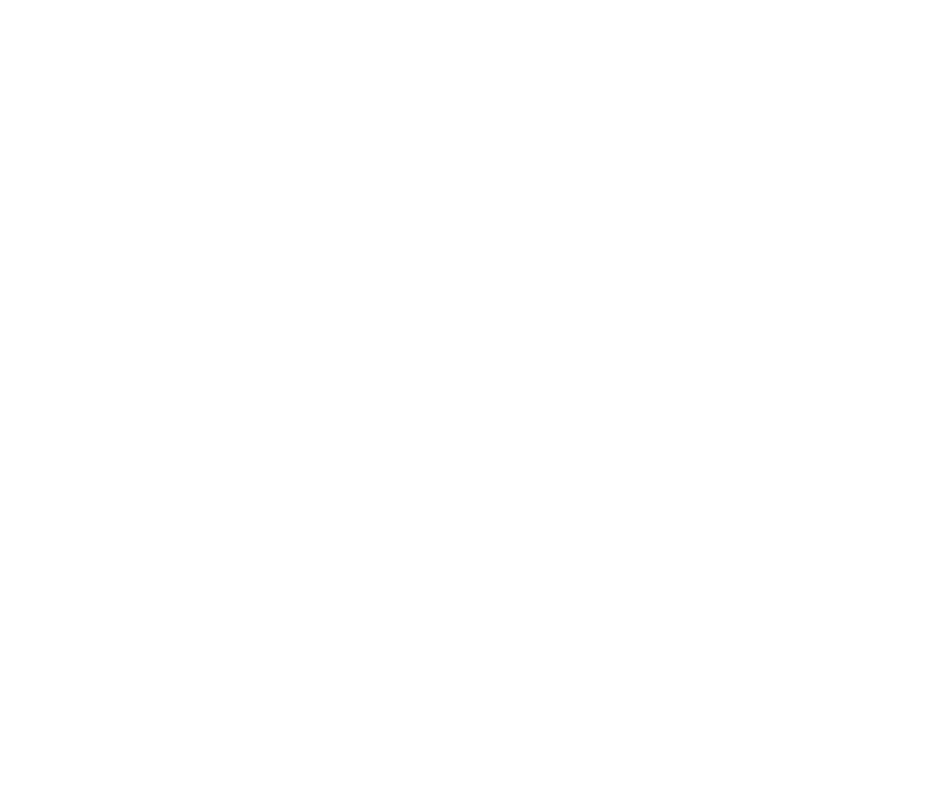

In [137]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the red masks
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue Mask')
plt.axis('off')

plt.show()

(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

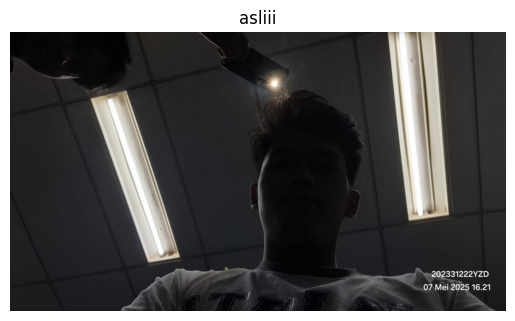

In [138]:
img2 = cv2.imread("selpinjiir.png")
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
baris = rgb2.shape[0]
kolom = rgb2.shape[1]
plt.imshow(rgb2)
plt.title("asliii")
plt.axis('off')

In [139]:
def show(x,y):
    plt.imshow(x, cmap='gray')
    plt.title(y)
    plt.axis('off')
    plt.show()

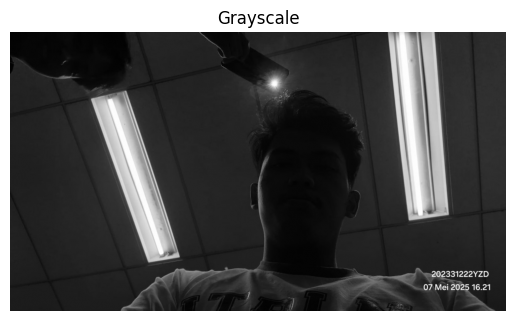

In [140]:
gray = np.zeros((baris, kolom), dtype=np.uint8)
for i in range(baris):
    for j in range(kolom):
        gray[i,j]=np.uint8(np.mean(rgb2[i,j]))

show(gray, "Grayscale")

C:\Users\ACER\AppData\Local\Temp\ipykernel_11688\2290088695.py:6: RuntimeWarning: overflow encountered in scalar add
  gyx = gray[x,y] + beta


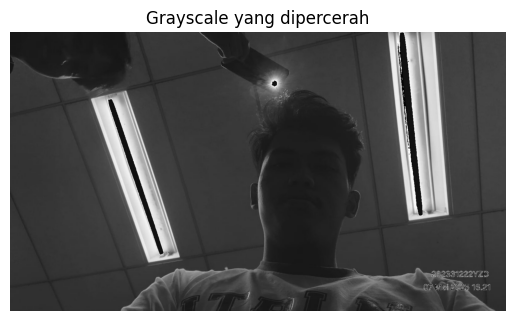

In [141]:
beta = 20
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = gray[x,y] + beta
        citra_cerah[x,y] = gyx

citra_cerah = citra_cerah.astype(np.uint8)
show(citra_cerah, "Grayscale yang dipercerah")

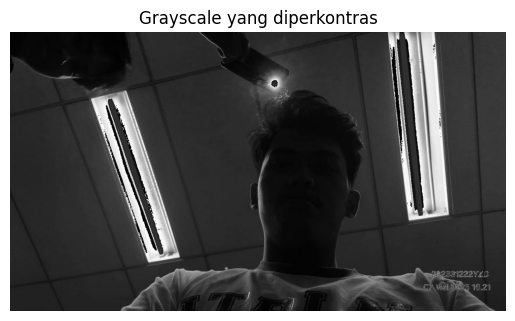

In [142]:
alpha = 1.2
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = gray[x,y] * alpha
        citra_kontras[x,y] = gyx

citra_kontras = citra_kontras.astype(np.uint8)
show(citra_kontras, "Grayscale yang diperkontras")

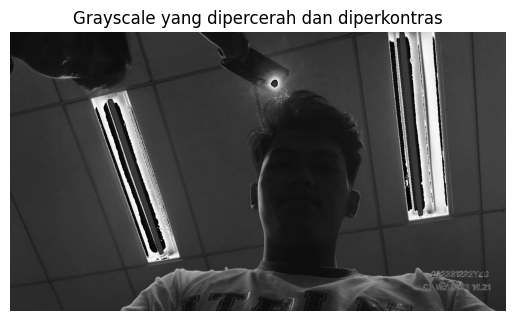

In [143]:

beta = 10
alpha = 1.2
citra_hasil = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = alpha *gray[x,y] + beta
        citra_hasil[x,y] = gyx

citra_hasil = citra_hasil.astype(np.uint8)
show(citra_hasil, "Grayscale yang dipercerah dan diperkontras")